# Analyse de l'influence des distributions des temps inter-véhiculaires sur un axe routier

Paramètres de simulation:
- 1 voie
- longueur de la voie : 15900 m
- présence d'outils de contrôle de la circulation : non
- paramètres de distribution 
    <br/> dn -> N(8.33, 1) [m]
    <br/> longueur -> N(7, 1) [m]
    <br/> vitesse -> N(14, 3) [m.s^-1]
    <br/> t -> N(2, 0.5) [s]
- durée de la simulation : 500 s = 5000 1/10s   
- seed pour reproductibilité : 45

import des librairies:

In [2]:
import sys
sys.path.append('/home/lionel/projetmaitrise/modules') 
import numpy as np  
import network, simulation 
import makesimulation 
import matplotlib.pyplot as plt
import analysis
import statistics

OpenCV library could not be loaded (video replay functions will not be available)


Récupération des fichiers initiaux

In [3]:
world = network.World.load('inputData/simple-net.yml')  
sim = simulation.Simulation.load('inputData/config.yml')

tracé des trajectoires selon les différentes valeurs des distribution pour les headway

- headways -> Exp(1.8, 1)
</br> On décalle la distribution à 1s % les temps inter-véhiculaires produits ne seront pas inférieurs à cette valeur

trying headway = 0.5
115 248925
trying headway = 0.6
113 240153
trying headway = 0.7
124 302476
trying headway = 0.7999999999999999
123 289432
trying headway = 0.8999999999999999
121 280636
trying headway = 0.9999999999999999
131 307239
trying headway = 1.0999999999999999
105 217033
trying headway = 1.1999999999999997
121 281906
trying headway = 1.2999999999999998
126 283420
trying headway = 1.4
103 204036
trying headway = 1.4999999999999998
123 272086
trying headway = 1.5999999999999996
112 246593
trying headway = 1.6999999999999997
121 262874
trying headway = 1.7999999999999998
110 238880
trying headway = 1.8999999999999997
120 255540
trying headway = 1.9999999999999996
95 173925


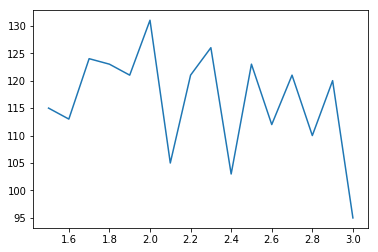

In [5]:
# liste des headways a essayer:
headways = [x for x in np.arange(.5,2.1,.1)]
# headways = [.8, .9, ]
hList = []
cList = []
for h in headways:
    # modification des paramètres dans simple-net.yml
    # au cas ou
    world = network.World.load('inputData/simple-net.yml')  
    
    world.userInputs[0].distributions['headway'].scale = h

    # running the simulation
    world = makesimulation.run(world, sim)
    print('trying headway = {}'.format(h))
    
    #get number of interactions
    interactionDuration = world.getInteractionsDuration(dmin=25, inLine=True)
    c = 0 # nombre d'interaction
    s = 0 # duree moyenne des interactions
    interactionLength = []
    for pair in interactionDuration:
        if interactionDuration[pair][0] !=0:
            c += interactionDuration[pair][0]
            s += sum(interactionDuration[pair][1:])
            interactionLength.append(interactionDuration[pair][1:])
    print(c, s)
    hList.append(1+h)
    cList.append(c)
plt.plot(hList, cList)
plt.show()
    
    

trying headway = 0.5
103 214755
trying headway = 0.6
96 218690
trying headway = 0.7
124 292009
trying headway = 0.7999999999999999
105 253544
trying headway = 0.8999999999999999
95 189258
trying headway = 0.9999999999999999
93 181860
trying headway = 1.0999999999999999
118 266204
trying headway = 1.1999999999999997
91 170077
trying headway = 1.2999999999999998
91 178338
trying headway = 1.4
111 273225
trying headway = 1.4999999999999998
110 267540
trying headway = 1.5999999999999996
111 265555
trying headway = 1.6999999999999997
109 257085
trying headway = 1.7999999999999998
104 239660
trying headway = 1.8999999999999997
124 278302
trying headway = 1.9999999999999996
123 271635


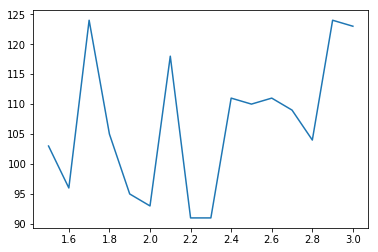

In [6]:
sim.seed = 55

# liste des headways a essayer:
headways = [x for x in np.arange(.5,2.1,.1)]
# headways = [.8, .9, ]
hList = []
cList = []
for h in headways:
    # modification des paramètres dans simple-net.yml
    # au cas ou
    world = network.World.load('inputData/simple-net.yml')  
    
    world.userInputs[0].distributions['headway'].scale = h

    # running the simulation
    world = makesimulation.run(world, sim)
    print('trying headway = {}'.format(h))
    
    #get number of interactions
    interactionDuration = world.getInteractionsDuration(dmin=25, inLine=True)
    c = 0 # nombre d'interaction
    s = 0 # duree moyenne des interactions
    interactionLength = []
    for pair in interactionDuration:
        if interactionDuration[pair][0] !=0:
            c += interactionDuration[pair][0]
            s += sum(interactionDuration[pair][1:])
            interactionLength.append(interactionDuration[pair][1:])
    print(c, s)
    hList.append(1+h)
    cList.append(c)
plt.plot(hList, cList)
plt.show()
    
    

trying headway = 0.5
131 304590
trying headway = 0.6
103 211499
trying headway = 0.7
100 202396
trying headway = 0.7999999999999999
117 264279
trying headway = 0.8999999999999999
107 240287
trying headway = 0.9999999999999999
97 187229
trying headway = 1.0999999999999999
109 255726
trying headway = 1.1999999999999997
108 250208
trying headway = 1.2999999999999998
94 170926
trying headway = 1.4
121 256824
trying headway = 1.4999999999999998
92 165128
trying headway = 1.5999999999999996
105 235233
trying headway = 1.6999999999999997
105 226769
trying headway = 1.7999999999999998
102 215963
trying headway = 1.8999999999999997
100 211970
trying headway = 1.9999999999999996
108 209826


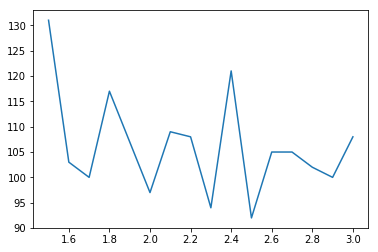

In [7]:
sim.seed = 60

# liste des headways a essayer:
headways = [x for x in np.arange(.5,2.1,.1)]
# headways = [.8, .9, ]
hList = []
cList = []
for h in headways:
    # modification des paramètres dans simple-net.yml
    # au cas ou
    world = network.World.load('inputData/simple-net.yml')  
    
    world.userInputs[0].distributions['headway'].scale = h

    # running the simulation
    world = makesimulation.run(world, sim)
    print('trying headway = {}'.format(h))
    
    #get number of interactions
    interactionDuration = world.getInteractionsDuration(dmin=25, inLine=True)
    c = 0 # nombre d'interaction
    s = 0 # duree moyenne des interactions
    interactionLength = []
    for pair in interactionDuration:
        if interactionDuration[pair][0] !=0:
            c += interactionDuration[pair][0]
            s += sum(interactionDuration[pair][1:])
            interactionLength.append(interactionDuration[pair][1:])
    print(c, s)
    hList.append(1+h)
    cList.append(c)
plt.plot(hList, cList)
plt.show()
    
    

<br/> Nombre de véhicules simulés/Nombre de véhicules générés : 

In [29]:
print(str(len(world.getNotNoneVehiclesInWorld()[0])) + '/'+ str(len(world.users)))

152/268


Distribution des headways observés

(array([1.07475635, 0.93796917, 0.72301791, 0.50806664, 0.33219742,
        0.41036151, 0.1563282 , 0.21495127, 0.19541024, 0.09770512,
        0.05862307, 0.13678717, 0.05862307, 0.01954102, 0.03908205,
        0.03908205, 0.01954102, 0.05862307, 0.05862307, 0.0781641 ,
        0.        , 0.        , 0.        , 0.        , 0.01954102]),
 array([1.01845862, 1.20940784, 1.40035705, 1.59130627, 1.78225548,
        1.9732047 , 2.16415392, 2.35510313, 2.54605235, 2.73700156,
        2.92795078, 3.11889999, 3.30984921, 3.50079842, 3.69174764,
        3.88269685, 4.07364607, 4.26459528, 4.4555445 , 4.64649371,
        4.83744293, 5.02839214, 5.21934136, 5.41029057, 5.60123979,
        5.792189  ]),
 <a list of 25 Patch objects>)

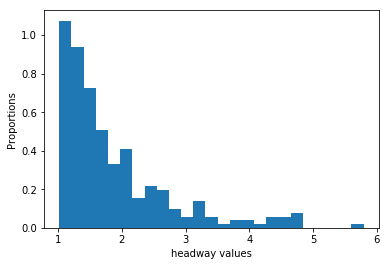

In [30]:
h = analysis.getHeadwayValues(world)
plt.xlabel('headway values')
plt.ylabel('Proportions')
plt.hist(h[0], density=True, bins = 25)

# print(statistics.mean(h[0]))
# print(statistics.mean(world.userInputs[0].headways))

Distribution des min des distances inter-véhiculaires, pour une coexistence d'une durée minimale de 2 min = 1200 1/10s

In [31]:
d = analysis.getMinDistanceBetweenEachPairC F(world, 1200)

(array([ 2.,  4.,  9., 11., 18., 18., 13.,  9., 11.,  5.,  4.,  3.,  3.,
         3.,  1.,  1.,  1.,  0.,  0.,  0.,  1.,  2.]),
 array([13.25974847, 14.52629299, 15.79283751, 17.05938204, 18.32592656,
        19.59247108, 20.85901561, 22.12556013, 23.39210465, 24.65864918,
        25.9251937 , 27.19173822, 28.45828275, 29.72482727, 30.99137179,
        32.25791632, 33.52446084, 34.79100536, 36.05754989, 37.32409441,
        38.59063893, 39.85718346, 41.12372798]),
 <a list of 22 Patch objects>)

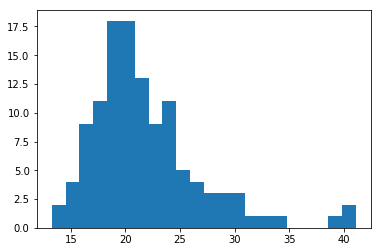

In [32]:
plt.hist(d, bins=22, density=False)# 'min distance between users', 'proportions')

Nombre d'interactions et leur durée observées à une distance < 25 m

In [36]:
interactionDuration = world.getInteractionsDuration(dmin=25, inLine=True)

In [37]:
c = 0 # nombre d'interaction
s = 0 # duree moyenne des interactions
interactionLength = []
for pair in interactionDuration:
    if interactionDuration[pair][0] !=0:
        c += interDuration[pair][0]
        s += sum(interactionDuration[pair][1:])
        interactionLength.append(interactionDuration[pair][1:])
print(c, s)

KeyError: (140, 141)

Durée moyenne des interactions

In [ ]:
if c != 0:
    print(s/c)

distribution de la durée des interactions (ayant lieu a une distance < 25 m)
</br>**a voir**

In [ ]:
plt.hist(interactionLength, bins=3, density=False)

Tracé des courbes de TTC

minTTCValues = analysis.getTTCValuesForEachPairOfVehicles(world, sim, plot=True)[1]

Distribution des TTC min

plt.hist(minTTCValues, bins=30, density=True)
minTTCValues

- headways -> Exp(2, 1)